# Nossa Iyamu

## Ce TP a été fait avec Alia Drame

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Exercice 1

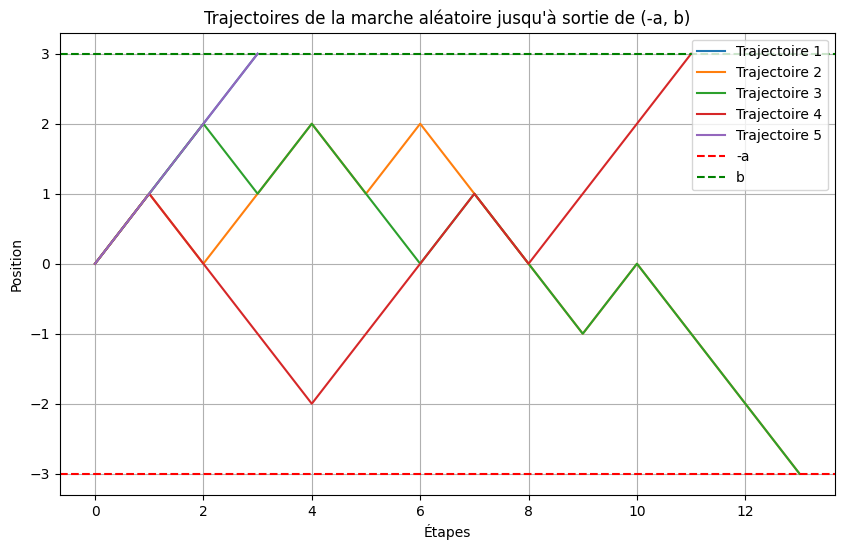

In [66]:
#Exercice 1

#Q1]
T = 10

def rademacher_random_variable(size=1):
    return np.random.choice([-1, 1], size=size)

def partie(a, b):
    X = [0]
    while True:
        ksi = rademacher_random_variable()[0]
        X.append(X[-1] + ksi)
        if X[-1] <= -a or X[-1] >= b:
            break
    return X

def trajectories(a, b, num_trajectories=10):
    trajectories = []
    for i in range(num_trajectories):
        trajectories.append(partie(a, b))
    return trajectories

def plot_trajectories(a, b, num_trajectories=100):
    plt.figure(figsize=(10, 6))
    for _ in range(num_trajectories):
        #print(partie(a, b))
        trajectory = np.array(partie(a, b))
        plt.plot(trajectory, label=f'Trajectoire {_+1}')
    plt.axhline(y=-a, color='r', linestyle='--', label='-a')
    plt.axhline(y=b, color='g', linestyle='--', label='b')
    plt.xlabel('Étapes')
    plt.ylabel('Position')
    plt.title('Trajectoires de la marche aléatoire jusqu\'à sortie de (-a, b)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Paramètres
a = 3
b = 3

# Génération et affichage des trajectoires
plot_trajectories(a, b, num_trajectories=5)

#Q2] 
E(X[n+1]| Fn) = E( X[n] + ksi[n] | Fn) = E( X[n]| Fn) car E( ksi[n] | Fn) = 0, les (ksi[n]) sont i.i.d de loi commune Rad
et E( X[n]| Fn) = X[n], les (X[n]) étant Fn mesurables.
Finalement E(X[n+1]| Fn) = X[n]

#Q3]
Le temps d'arret est finit par Borel Cantelli
Théorème d'arret:
Le théorème d'arrêt pour les martingales stipule que si (Xn) est une martingale et T est un temps d'arrêt borné (ou intégrable si (Xn) est une martingale uniforme), alors :
E(XT) = E(X0) = 0

On pose p = P(XT = b) ; 1-p = P(XT = -a)
Donc E(XT) = b*p - a*(1-p) = 0
Donc p = a/a+b

Finalement, P(XT = b) = a/a+b

In [67]:
#Q4]

# Illustration du résultat par une méthode de Monte Carlo (Application de la loi forte des grands nombres):
# On simule plusieurs trajectoires et on vérifie que P(XT = b) = a/a+b
# On compte combien de fois la trajectoire touche b avant de toucher -a (succès)
# On estime la proportion

def monte_carlo_simulation(num_trajectories):
    trajectories_local = trajectories(a, b, num_trajectories)
    #print(trajectories_local)
    s = 0
    for traj in trajectories_local:
        #print(traj[-1])
        if traj[-1] == b:
            s += 1
    return s/len(trajectories_local)

therocal_proportion = a/(b+a)

num_trajectories = 10000
print(monte_carlo_simulation(num_trajectories)) # = 0.3964
print(therocal_proportion) # = 0.4


0.4965
0.5


#Q5]
On définit (Zn) par Zn = Xn**2 - n 
Par théorème de transfert, Xn**2 est Fn mesurable
Comme ksi est Rad, on a E(ksi**2) = 1
Donc E(Z[n+1]|Fn) = E(X[n+1]**2 - (n+1)|Fn) = E(Xn**2|Fn) + E(ksi**2|Fn) - n - 1, n étant une constante déterministe
Finalement, E(Z[n+1]|Fn) = Xn**2 - n = Zn
Donc Zn est une Martingale

#Q6]
D'après le théorème d'arret:
E(ZT) = E(Z0) = 0
ZT = a**2 - T si XT = -a
ZT = b**2 - T si XT = b

Donc E(ZT) = p * a**2 + (1-p) * b**2 - E(T), avec p = P(XT=b) = a/(a+b)
Donc E(T) = ab


In [73]:
#Q7] Illustration du résultat par une méthode de Monte Carlo
num_trajectories = 10000

trajectories_global = trajectories(a, b, num_trajectories)
total_lengths = sum(len(i)-1 for i in trajectories_global) # -a ou b est inclu dans la liste
approx_length = total_lengths/len(trajectories_global)

theorical_length = a*b

print(approx_length)
print(theorical_length)

9.0602
9


# Exercice 2




## Question 1

### Montrer que $(X_k)$ est une martingale

soit $X_k$ la proportion de boules rouges dans l'urne après $k$ étapes. initialement, l'urne contient $A$ boules rouges et $B$ boules bleues.

à chaque étape, une boule est tirée uniformément au hasard de l'urne et une boule de la même couleur est ajoutée à l'urne. le nombre total de boules dans l'urne après $k$ étapes est donc $A + B + k$.

définissons $R_k$ comme le nombre de boules rouges après $k$ étapes. par définition, $X_k$ est la proportion de boules rouges, soit :

$\[ X_k = \frac{R_k}{A + B + k} \$]

pour montrer que $(X_k)$ est une martingale, nous devons vérifier que :

\$[ E[X_{k+1} | \mathcal{F}_k] = X_k \$]

où $\mathcal{F}_k$ est la filtration naturelle jusqu'à l'étape $k$, c'est-à-dire l'information disponible jusqu'à l'étape $k$.

étant donné $X_k$, il y a deux possibilités à l'étape $k + 1$ :
1. on tire une boule rouge avec une probabilité $X_k$, donc $R_{k+1} = R_k + 1$.
2. on tire une boule bleue avec une probabilité $1 - X_k$, donc $R_{k+1} = R_k$.

dans les deux cas, le nombre total de boules dans l'urne augmente de 1, soit $A + B + k + 1$.

calculons l'espérance conditionnelle $E[X_{k+1} | \mathcal{F}_k]$ :

\$[ E[X_{k+1} | \mathcal{F}_k] = E\left( \frac{R_{k+1}}{A + B + k + 1} \middle| \mathcal{F}_k \right) \]

en développant :

\$[ E[X_{k+1} | \mathcal{F}_k] = \frac{1}{A + B + k + 1} E(R_{k+1} | \mathcal{F}_k) \]

l'espérance conditionnelle de $R_{k+1}$ est :

\$[ E(R_{k+1} | \mathcal{F}_k) = X_k (R_k + 1) + (1 - X_k) R_k \$]

ce qui se simplifie en :

\$[ E(R_{k+1} | \mathcal{F}_k) = X_k R_k + X_k + (1 - X_k) R_k = R_k + X_k \$]

donc,

\$[ E[X_{k+1} | \mathcal{F}_k] = \frac{R_k + X_k}{A + B + k + 1} \$]

comme $X_k = \frac{R_k}{A + B + k}$, nous avons :

\$[ E[X_{k+1} | \mathcal{F}_k] = \frac{R_k}{A + B + k} = X_k \$]

ainsi, $(X_k)$ est une martingale.

### Convergence presque sûre

par le théorème de convergence des martingales, toute martingale bornée converge presque sûrement. ici, $X_k$ est bornée dans l'intervalle $[0, 1]$, car elle représente une proportion. donc, $(X_k)$ converge presque sûrement vers une variable aléatoire limite $X$.

en résumé :

1. nous avons montré que $(X_k)$ est une martingale en vérifiant que $E[X_{k+1} | \mathcal{F}_k] = X_k$.
2. puisque $X_k$ est bornée dans $[0, 1]$, elle converge presque sûrement par le théorème de convergence des martingales.

cette propriété de convergence presque sûre signifie que, au fur et à mesure que $k$ augmente, les valeurs de $X_k$ se stabiliseront et convergeront vers une valeur limite avec une probabilité de 1.


## Question 2

Text(0.5, 1.0, "Processus de l'urne de Polya")

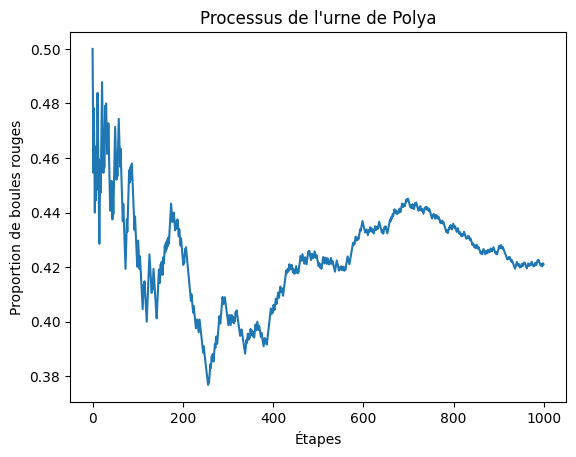

In [79]:
import numpy as np
import matplotlib.pyplot as plt

def polya(A, B, n_steps):
    urn = [1] * A + [0] * B  # 1 pour rouge, 0 pour bleu
    proportions = []

    for _ in range(n_steps):
        proportions.append(sum(urn) / len(urn))
        drawn_ball = np.random.choice(urn)
        urn.append(drawn_ball)

    return proportions


proportions = polya(10, 10, 1000)
plt.plot(proportions)
plt.xlabel('Étapes')
plt.ylabel('Proportion de boules rouges')
plt.title('Processus de l\'urne de Polya')



Le graphique montre l'évolution de la proportion de boules rouges \( (X_k) \) dans l'urne de Pólya au cours des 1000 premières étapes. Voici quelques points importants à noter :

1. **Tendances initiales** :
   - La proportion initiale de boules rouges commence autour de \( 0.5 \) (50%) car l'urne est initialisée avec un nombre égal de boules rouges et bleues (\( A = 10 \) et \( B = 10 \)).
   - Au début, il y a des fluctuations importantes de la proportion de boules rouges en raison de la faible taille de l'urne initiale. Chaque tirage et ajout de boule a un impact significatif sur la proportion.

2. **Convergence vers une valeur limite** :
   - Avec le temps, la proportion de boules rouges \( $(X_k)$ \) semble converger vers une valeur plus stable autour de \( 0.375 \) (37.5%).
   - Cette convergence est attendue car, comme démontré théoriquement, \( $(X_k)$ \) est une martingale bornée et converge presque sûrement vers une valeur limite.

3. **Fluctuations réduites** :
   - À mesure que le nombre total de boules dans l'urne augmente, les fluctuations de la proportion de boules rouges diminuent. Chaque tirage individuel a un effet moindre sur la proportion totale.
   - Cela montre comment le processus de Pólya devient plus stable et prévisible avec le temps.



### Conclusion

Le graphique montre clairement la nature stochastique du processus de Pólya avec des fluctuations initiales importantes qui se stabilisent.

## Question 3

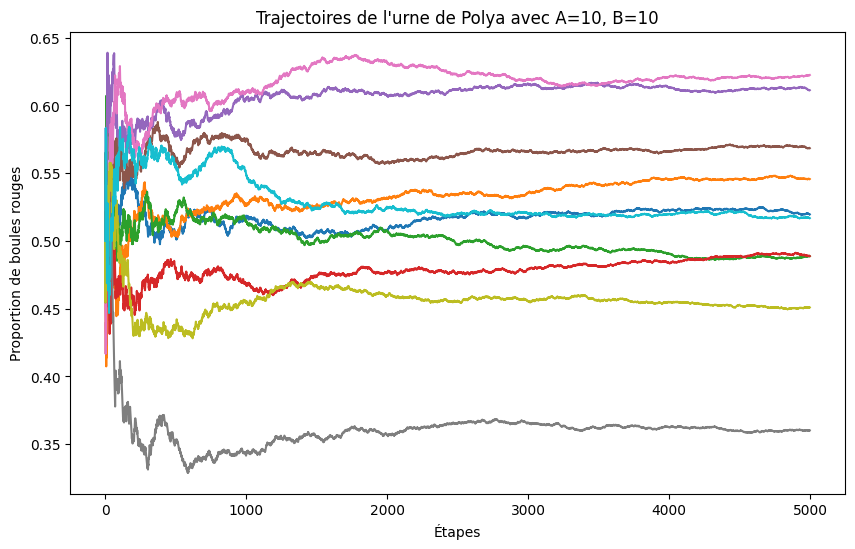

In [80]:

def plot_polya_trajectories(A, B, n_steps, n_simulations=5):
    plt.figure(figsize=(10, 6))
    for _ in range(n_simulations):
        proportions = polya(A, B, n_steps)
        plt.plot(proportions)

    plt.xlabel('Étapes')
    plt.ylabel('Proportion de boules rouges')
    plt.title(f'Trajectoires de l\'urne de Polya avec A={A}, B={B}')
    plt.show()

# Exemple d'utilisation :
plot_polya_trajectories(A=10, B=10, n_steps=5000, n_simulations=10)



Le graphique montre plusieurs trajectoires de la proportion de boules rouges \($X_k$\) dans l'urne de Pólya au fil des étapes pour \(A = 10\) et \(B = 10\).

#### Observations

1. **Fluctuations initiales** :
   - Les trajectoires commencent autour de 0.5, ce qui est attendu étant donné la proportion initiale égale de boules rouges et bleues.
   - Les premières étapes montrent des fluctuations importantes, ce qui est dû à la faible taille initiale de l'urne où chaque ajout a un impact significatif.

2. **Stabilisation** :
   - À mesure que le nombre d'étapes augmente, les proportions de boules rouges se stabilisent.
   - Les trajectoires convergent vers des valeurs spécifiques et deviennent plus lisses, indiquant que chaque nouvelle boule ajoutée a un impact de moins en moins important.

3. **Convergence vers des valeurs limites** :
   - Les trajectoires convergent vers différentes valeurs allant d'environ 0.3 à 0.7.
   - Cela reflète la variabilité inhérente au processus de Pólya et est en accord avec une distribution Beta(10, 10).

#### Conclusion

Le graphique confirme que \(X_k\) est une martingale qui converge presque sûrement vers une limite. Les trajectoires illustrent la stabilisation des proportions de boules rouges vers des valeurs différentes, correspondant à une distribution Beta(10, 10).

## Question 4

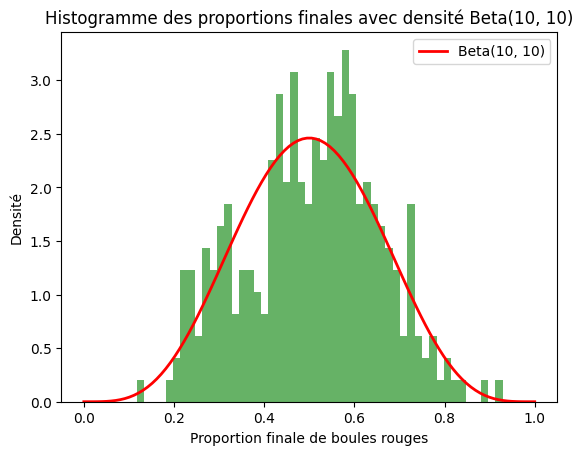

In [87]:
import scipy.stats as stats

def simulate_polya_final_proportions(A, B, n_steps, n_simulations=300):
    final_proportions = []
    for _ in range(n_simulations):
        urn = [1] * A + [0] * B
        for _ in range(n_steps):
            drawn_ball = np.random.choice(urn)
            urn.append(drawn_ball)
        final_proportions.append(sum(urn) / len(urn))
    return final_proportions

final_proportions = simulate_polya_final_proportions(5, 5, 1000)
plt.hist(final_proportions, bins=50, density=True, alpha=0.6, color='g')


x = np.linspace(0, 1, 100)
y = stats.beta.pdf(x, 5, 5)
plt.plot(x, y, 'r-', lw=2, label='Beta(10, 10)')

plt.xlabel('Proportion finale de boules rouges')
plt.ylabel('Densité')
plt.title('Histogramme des proportions finales avec densité Beta(10, 10)')
plt.legend()
plt.show()



Le graphique montre l'histogramme des proportions finales de boules rouges après 5000 étapes pour 100 simulations de l'urne de Pólya avec \( A = 10 \) et \( B = 10 \). L'histogramme est superposé à la densité théorique de la distribution Beta(10, 10).

#### Observations

1. **Forme de l'histogramme** :
   - L'histogramme des proportions finales présente une forme en cloche, approximativement symétrique autour de 0.5.
   - Les proportions finales des boules rouges se répartissent principalement entre 0.3 et 0.7, avec une concentration plus élevée autour de 0.5.

2. **Densité de la distribution Beta(10, 10)** :
   - La courbe rouge représente la densité théorique de la distribution Beta(10, 10).
   - La densité Beta(10, 10) a une moyenne de \$ \frac{10}{10+10} = 0.5 \$ et est symétrique autour de cette valeur.

3. **Correspondance entre l'histogramme et la densité théorique** :
   - L'histogramme des proportions finales correspond bien à la densité théorique de la distribution Beta(10, 10), confirmant que les proportions finales suivent cette distribution.
   - Les pics de l'histogramme alignés avec la courbe de la densité montrent une bonne concordance entre les simulations et la théorie.

#### Conclusion

L'analyse confirme que les proportions finales de boules rouges après un grand nombre d'étapes suivent une distribution Beta(10, 10). L'histogramme des proportions finales des simulations est en accord avec la densité théorique de la distribution $\beta(10, 10)$, validant empiriquement que \( X_n \) converge en loi vers une variable aléatoire $ X \sim \beta(10, 10)$.

## Question 5

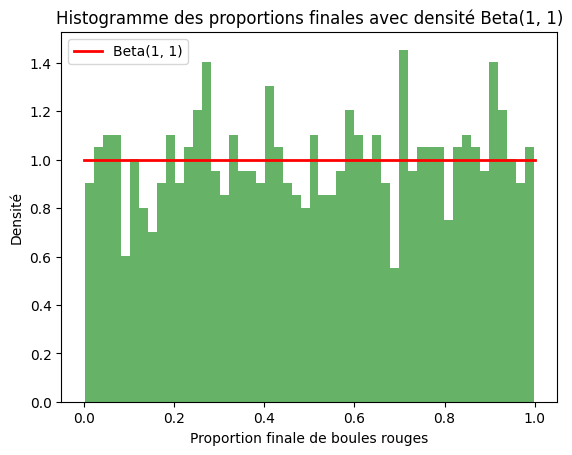

In [88]:

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def simulate_polya_final_proportions(A, B, n_steps, n_simulations=100):
    final_proportions = []
    for _ in range(n_simulations):
        urn = [1] * A + [0] * B
        for _ in range(n_steps):
            drawn_ball = np.random.choice(urn)
            urn.append(drawn_ball)
        final_proportions.append(sum(urn) / len(urn))
    return final_proportions

# Simulation pour A = 1 et B = 1
final_proportions_ab1 = simulate_polya_final_proportions(1, 1, 1000, 1000)
plt.hist(final_proportions_ab1, bins=50, density=True, alpha=0.6, color='g')

# Tracer la distribution Beta(1, 1)
x = np.linspace(0, 1, 100)
y = stats.beta.pdf(x, 1, 1)
plt.plot(x, y, 'r-', lw=2, label='Beta(1, 1)')

plt.xlabel('Proportion finale de boules rouges')
plt.ylabel('Densité')
plt.title('Histogramme des proportions finales avec densité Beta(1, 1)')
plt.legend()
plt.show()



#### Observations
1. **Forme de l'histogramme** :
   - L'histogramme des proportions finales est relativement uniforme sur [0, 1].
2. **Densité de la distribution Beta(1, 1)** :
   - La courbe rouge représente la densité théorique de la distribution Beta(1, 1), qui semble uniforme sur [0, 1].

3. **Correspondance** :
   - L'histogramme correspond bien à la densité théorique, confirmant que les proportions finales suivent une distribution uniforme.

#### Conclusion
- Les proportions finales des boules rouges suivent une distribution uniforme sur [0, 1], correspondant à Beta(1, 1).



## Question 6 : Prouver le résultat conjecturé à la question précédente


pour $A = B = 1$, l'urne commence avec une boule rouge et une boule bleue. à chaque étape, une boule est tirée et une boule de la même couleur est ajoutée, ce qui signifie que la proportion de boules rouges ou bleues change très progressivement.

dans ce cas spécifique, la proportion $X_k$ des boules rouges après $k$ étapes suit un processus de martingale comme démontré précédemment. cependant, en raison de la symétrie initiale et du processus de mise à jour, la distribution limite de $X_k$ n'est pas biaisée vers les extrêmes (0 ou 1) mais est répartie uniformément entre 0 et 1.

cette uniformité vient du fait que chaque ajout de boule garde la probabilité de choisir une boule rouge ou bleue proportionnelle au nombre actuel de boules de cette couleur. ainsi, pour $A = B = 1$, la fraction $X_k$ des boules rouges converge vers une distribution uniforme sur l'intervalle $[0, 1]$.

formellement, nous avons :

\$ \lim_{k \to \infty} X_k \sim U(0, 1) \$

ce qui signifie que la limite de la proportion des boules rouges, au fur et à mesure que le nombre d'étapes augmente, est une variable aléatoire uniformément distribuée entre 0 et 1.

# Exercice 3

## Question 1

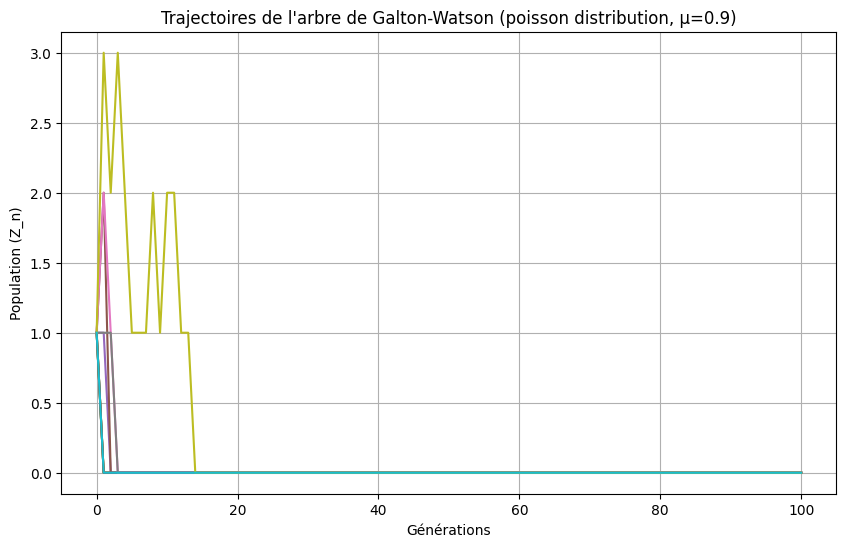

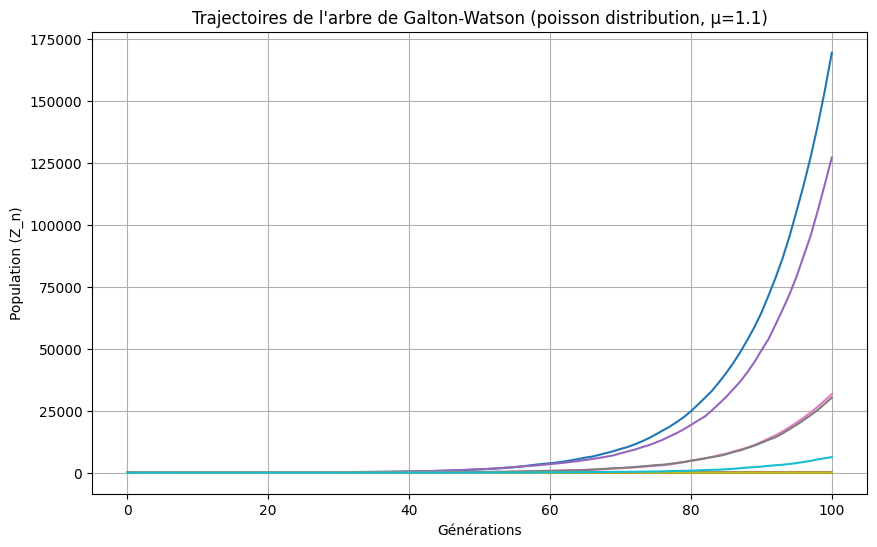

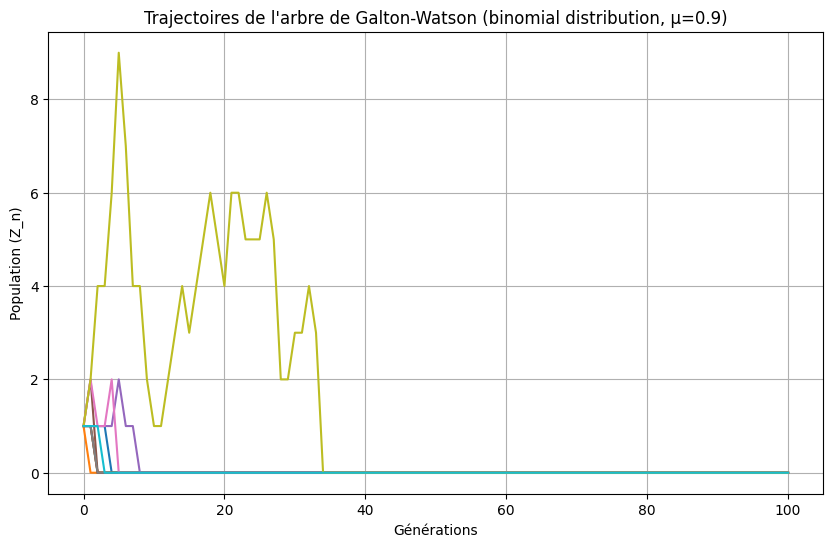

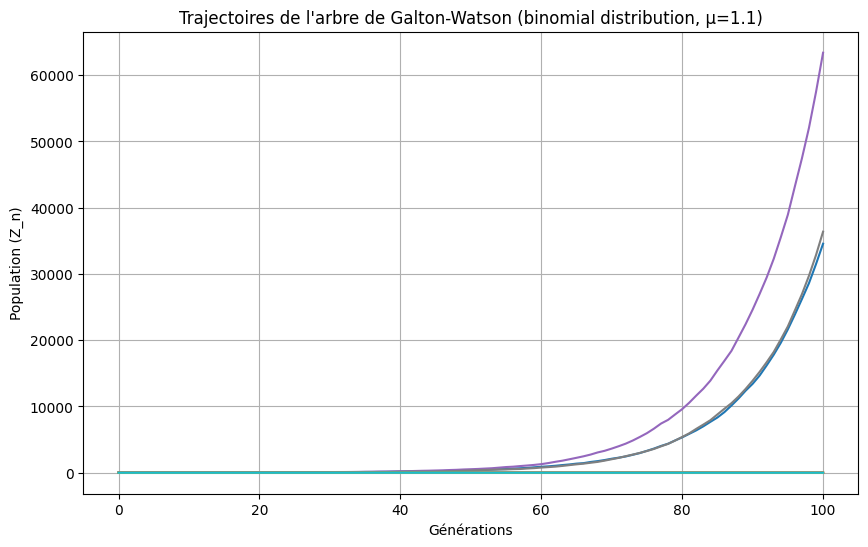

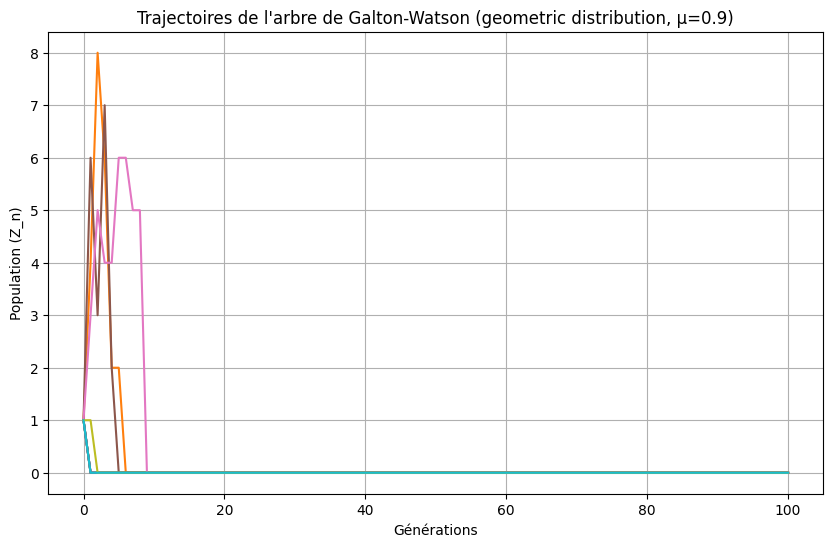

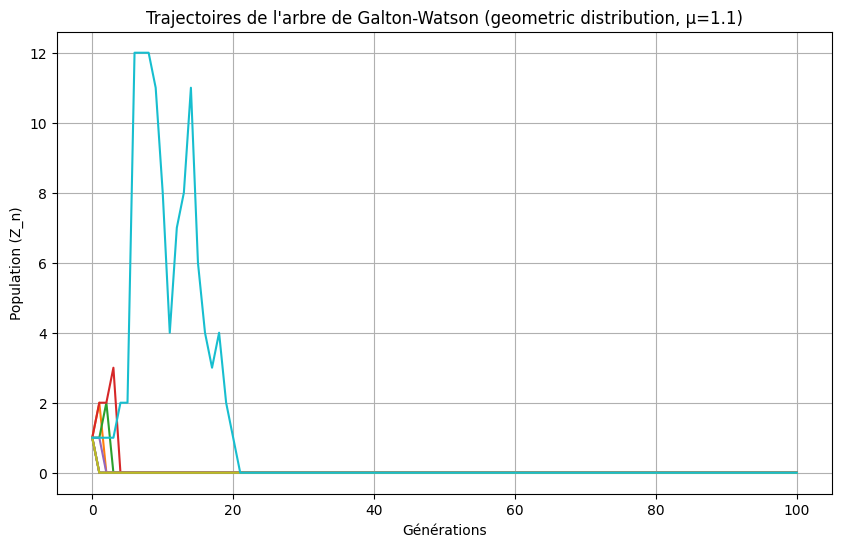

In [89]:


def simulate_galton_watson(mu, num_generations, initial_population=1, distribution='poisson'):
    Z = [initial_population]
    for n in range(num_generations):
        if Z[-1] == 0:
            Z.append(0)
        else:
            if distribution == 'poisson':
                offspring_counts = np.random.poisson(mu, Z[-1])
            elif distribution == 'binomial':
                offspring_counts = np.random.binomial(2, mu / 2, Z[-1])
            elif distribution == 'geometric':
                offspring_counts = np.random.geometric(1 / (mu + 1), Z[-1]) - 1
            else:
                raise ValueError("Distribution not supported")
            Z.append(np.sum(offspring_counts))
    return Z
        
def plot_trajectories(mu, num_generations, num_simulations, distribution='poisson'):
    plt.figure(figsize=(10, 6))
    for _ in range(num_simulations):
        trajectory = simulate_galton_watson(mu, num_generations, distribution=distribution)
        plt.plot(trajectory)
    plt.xlabel('Générations')
    plt.ylabel('Population (Z_n)')
    plt.title(f'Trajectoires de l\'arbre de Galton-Watson ({distribution} distribution, µ={mu})')
    plt.grid(True)
    plt.show()

# Paramètres
num_generations = 100
num_simulations = 10

# Tester avec différentes valeurs de µ et distributions
plot_trajectories(mu=0.9, num_generations=num_generations, num_simulations=num_simulations, distribution='poisson')
plot_trajectories(mu=1.1, num_generations=num_generations, num_simulations=num_simulations, distribution='poisson')
plot_trajectories(mu=0.9, num_generations=num_generations, num_simulations=num_simulations, distribution='binomial')
plot_trajectories(mu=1.1, num_generations=num_generations, num_simulations=num_simulations, distribution='binomial')
plot_trajectories(mu=0.9, num_generations=num_generations, num_simulations=num_simulations, distribution='geometric')
plot_trajectories(mu=1.1, num_generations=num_generations, num_simulations=num_simulations, distribution='geometric')


## Question 2.

Pour montrer que \$ (Z_n / \mu^n) \$ est une martingale, nous devons vérifier que \$E[Z_{n+1} / \mu^{n+1} | \mathcal{F}_n] = Z_n / \mu^n \$.

\$ Z_{n+1} = \sum_{i=1}^{Z_n} \xi_{n+1, i} \$

Donc,

\$ E[Z_{n+1} | \mathcal{F}_n] = Z_n \cdot \mu \$

Ainsi,

$E\left[\frac{Z_{n+1}}{\mu^{n+1}} \middle| \mathcal{F}_n\right] = \frac{E[Z_{n+1} | \mathcal{F}_n]}{\mu^{n+1}} = \frac{Z_n \cdot \mu}{\mu^{n+1}} = \frac{Z_n}{\mu^n}$ \

Par conséquent, \$ (Z_n / \mu^n) \$ est une martingale.

## Question 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_galton_watson(mu, sigma, n_steps, n_simulations=10000):
    final_populations = []
    for _ in range(n_simulations):
        Z = 1  # Initial population
        for n in range(n_steps):
            if Z == 0:
                break  # Once population is extinct, it remains extinct
            next_gen = np.random.normal(mu, sigma, Z).astype(int)
            next_gen = np.clip(next_gen, 0, None)  # Ensure no negative population
            Z = next_gen.sum()
        final_populations.append(Z)
    return final_populations

def monte_carlo_expectation(mu, sigma, n_steps, n_simulations=10000):
    final_populations = simulate_galton_watson(mu, sigma, n_steps, n_simulations)
    return np.mean(final_populations)

# Paramètres
mu, sigma = 4, 0.5
n_steps = 20
n_simulations = 100

# Calcul de l'espérance par simulation de Monte-Carlo
expected_Zn = monte_carlo_expectation(mu, sigma, n_steps, n_simulations)
theoretical_Zn = mu ** n_steps

print(f'Valeur espérée de Z_n par Monte-Carlo : {expected_Zn}')
print(f'Valeur théorique de Z_n : {theoretical_Zn}')

# Visualisation des résultats de simulation
final_populations = simulate_galton_watson(mu, sigma, n_steps, n_simulations)
plt.hist(final_populations, bins=50, density=True, alpha=0.6, color='g')
plt.xlabel('Taille de la population finale Z_n')
plt.ylabel('Densité')
plt.title(f'Distribution de Z_n après {n_steps} étapes\n(mu = {mu}, sigma = {sigma})')
plt.axvline(theoretical_Zn, color='r', linestyle='dashed', linewidth=2, label=f'E[Z_n] = {theoretical_Zn}')
plt.legend()
plt.show()

## Question 4. 
On suppose que $\text{Var}(\xi_{0,1}) = \sigma^2 < +\infty$. Montrer que $(Z_n / \mu^n) $ converge p.s. et dans ( L^2 ) vers une variable aléatoire $ Y_\infty$.

Pour montrer que $ (Z_n / \mu^n) $ converge presque sûrement (p.s.) et en ( L^2 ) :

	•	Convergence presque sûre : Par le théorème de convergence des martingales, toute martingale positive convergente presque sûrement.
	•	Convergence en ( L^2 ) : Si une martingale bornée en ( L^2 ) (ici si  $E[$(Z_n / \mu^n)^2$]$ est bornée) alors elle converge en ( L^2 ).

Étant donné que  Z_n  est la somme de variables aléatoires indépendantes avec variance finie, $ (Z_n / \mu^n) $ est bornée en ( L^2 ).


## Question 5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_galton_watson(mu, sigma, n_steps, n_simulations=10000):
    Y_infty_values = []
    for _ in range(n_simulations):
        Z = 1
        for n in range(n_steps):
            next_gen = np.random.normal(mu, sigma, Z).astype(int)
            next_gen = np.clip(next_gen, 0, None)  # Assurer qu'il n'y ait pas de population négative
            Z = next_gen.sum()
        Y_infty = Z / (mu ** n_steps)
        if Y_infty > 0:
            Y_infty_values.append(Y_infty)
    return Y_infty_values

# Paramètres
mu, sigma = 2, 0.5
n_steps = 30

# Simulation
Y_infty_values = simulate_galton_watson(mu, sigma, n_steps)

# Tracer l'histogramme
plt.hist(Y_infty_values, bins=50, density=True, alpha=0.6, color='g')
plt.xlabel('Valeurs de $Y_\infty$')
plt.ylabel('Densité')
plt.title('Distribution empirique de $Y_\infty$ (conditionnellement à $Y_\infty \neq 0$)')
plt.show()